# Convolutional Neural Networks and Computer Vision

# Get the data

In [57]:
import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

In [58]:
import os

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 1 images in 'pizza_steak'.
There are 2 directories and 1 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 1 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [59]:
import pathlib
import numpy as np

data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [60]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_images(target_dir, target_class):
    target_folder = target_dir + '/' + target_class

    random_image = random.sample(os.listdir(target_folder), 1)
    # print(random_image)

    img = mpimg.imread(target_folder + '/' + random_image[0])
    plt.imshow(img)
    plt.title(target_class)

    print(f"Image shape: {img.shape}")

    return img

Image shape: (512, 382, 3)


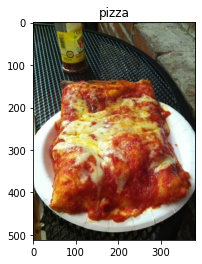

In [61]:
img = view_random_images('pizza_steak/train', 'pizza')

In [62]:
# import tensorflow as tf
# img = tf.constant(img)
# img.shape, img.dtype, img.ndim
# img = img / 255
# img

In [63]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1.0 / 255)
valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"


train_data = train_datagen.flow_from_directory(
    train_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42
)
valid_data = valid_datagen.flow_from_directory(
    test_dir, batch_size=32, target_size=(224, 224), class_mode="binary", seed=42
)

model_1 = tf.keras.models.Sequential()
model_1.add(tf.keras.layers.InputLayer((224, 224, 3)))
model_1.add(tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))

model_1.add(tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.Conv2D(10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), padding="valid"))

model_1.add(tf.keras.layers.Flatten())
model_1.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_1.compile(
    loss="binary_crossentropy",
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy"],
)

history_1 = model_1.fit(
    train_data,
    epochs=10,
    steps_per_epoch=len(train_data),
    validation_data=valid_data,
    validation_steps=len(valid_data),
)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/10
47/47 [==============================] - 7s 144ms/step - loss: 0.5601 - accuracy: 0.7100 - val_loss: 0.3908 - val_accuracy: 0.8320
Epoch 2/10
47/47 [==============================] - 6s 132ms/step - loss: 0.4030 - accuracy: 0.8233 - val_loss: 0.3693 - val_accuracy: 0.8380
Epoch 3/10
47/47 [==============================] - 6s 125ms/step - loss: 0.3907 - accuracy: 0.8313 - val_loss: 0.3427 - val_accuracy: 0.8620
Epoch 4/10
47/47 [==============================] - 6s 128ms/step - loss: 0.3347 - accuracy: 0.8527 - val_loss: 0.2885 - val_accuracy: 0.8840
Epoch 5/10
47/47 [==============================] - 6s 125ms/step - loss: 0.2900 - accuracy: 0.8807 - val_loss: 0.3238 - val_accuracy: 0.8800
Epoch 6/10
47/47 [==============================] - 6s 129ms/step - loss: 0.2823 - accuracy: 0.8780 - val_loss: 0.2841 - val_accuracy: 0.8840
Epoch 7/10
47/47 [==============================] - 6s 126ms/step

In [64]:
model_1.summary()

<bound method Model.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x000001E4374C13A0>>